# Pavan Tej
210968176

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Pre processing

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Geography'] = le.fit_transform(df['Geography'])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df = df.drop('Surname',axis=1)

In [11]:
df = df.drop('RowNumber',axis=1)

In [12]:
df = df.drop('CustomerId',axis=1)

In [13]:
print(df['CreditScore'].max())
print(df['CreditScore'].min())

850
350


In [14]:
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary','Age','Tenure']] = scaler.fit_transform(df[['Age','CreditScore','Balance','EstimatedSalary','Tenure']])

In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.293517,0,0,0.021886,-1.041760,-0.326221,1,1,1,-1.225848,1
1,0.198164,2,0,0.216534,-1.387538,-0.440036,1,0,1,0.117350,0
2,0.293517,0,0,0.240687,1.032908,-1.536794,3,1,0,1.333053,1
3,0.007457,0,0,-0.108918,-1.387538,0.501521,2,0,0,-1.225848,0
4,0.388871,2,0,-0.365276,-1.041760,2.063884,1,1,1,0.785728,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.007457,0,1,-0.066419,-0.004426,1.246488,2,1,0,-1.225848,0
9996,-0.373958,0,1,0.027988,1.724464,-1.391939,1,1,1,-0.306379,0
9997,-0.278604,0,0,-1.008643,0.687130,0.604988,1,0,1,-1.225848,1
9998,0.293517,1,1,-0.125231,-0.695982,1.256835,2,1,0,-0.022608,1


In [16]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Experimentation

In [17]:
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.15,random_state =42)
num_features = X_train.shape[1]

In [18]:
num_features

10

In [19]:
model1 = Sequential([
    Input(shape=(num_features,)),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [20]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model2 = Sequential([
    Input(shape=(num_features,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [22]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model3 = Sequential([
    Input(shape=(num_features,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [24]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1408      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
models = [model1,model2,model3]
lr = [0.1,0.01,0.001]
epochs= [10,20,30]

In [26]:
def model_evaluation(models,lr,epochs):
    for model in models:
        for learning_rate in lr:
            optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
            model.compile(optimizer=optimizer,loss = 'binary_crossentropy',metrics = ['accuracy','Precision','Recall'])
            for epoch in epochs:
                history = model.fit(X_train,Y_train,epochs=epoch,batch_size = 32,validation_split= 0.15)
                history
                training_loss = history.history['loss']
                training_acc = history.history['accuracy']
                training_precision = history.history['precision']
                training_recall = history.history['recall']
                validation_loss = history.history['val_loss']
                validation_acc = history.history['val_accuracy']
                validation_precision = history.history['val_precision']
                validation_recall = history.history['val_recall']
                e= range(0,epoch)
                plt.figure(figsize=(10, 6))
                plt.subplot(2, 2, 1)
                plt.plot(e, training_loss, label='Training Loss')
                plt.plot(e, validation_loss, label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
    
                plt.subplot(2, 2, 2)
                plt.plot(e, training_acc, label='Training Accuracy')
                plt.plot(e, validation_acc, label='Validation Accuracy')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
    
                plt.subplot(2, 2, 3)
                plt.plot(e, training_precision, label='Training Precision')
                plt.plot(e, validation_precision, label='Validation Precision')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
    
                plt.subplot(2, 2, 4)
                plt.plot(e, training_recall, label='Training Recall')
                plt.plot(e, validation_recall, label='Validation Recall')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
    
                plt.tight_layout()
                plt.show()          


                
                      

Epoch 1/10
226/226 [==============================] - 2s 3ms/step - loss: 0.4490 - accuracy: 0.8003 - precision: 0.5763 - recall: 0.1018 - val_loss: 0.4220 - val_accuracy: 0.8141 - val_precision: 0.6111 - val_recall: 0.2529
Epoch 2/10
226/226 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8161 - precision: 0.6696 - recall: 0.2050 - val_loss: 0.4170 - val_accuracy: 0.8275 - val_precision: 0.7887 - val_recall: 0.2146
Epoch 3/10
226/226 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8226 - precision: 0.7072 - recall: 0.2313 - val_loss: 0.4115 - val_accuracy: 0.8298 - val_precision: 0.7292 - val_recall: 0.2682
Epoch 4/10
226/226 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8287 - precision: 0.7153 - recall: 0.2744 - val_loss: 0.4103 - val_accuracy: 0.8369 - val_precision: 0.7190 - val_recall: 0.3333
Epoch 5/10
226/226 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8311 - pr

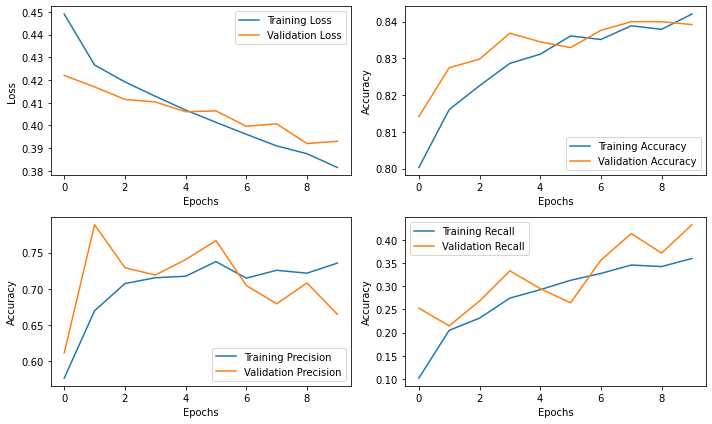

Epoch 1/20
226/226 [==============================] - 1s 2ms/step - loss: 0.3787 - accuracy: 0.8411 - precision: 0.7230 - recall: 0.3661 - val_loss: 0.3795 - val_accuracy: 0.8424 - val_precision: 0.7459 - val_recall: 0.3487
Epoch 2/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8435 - precision: 0.7398 - recall: 0.3661 - val_loss: 0.3800 - val_accuracy: 0.8408 - val_precision: 0.7266 - val_recall: 0.3563
Epoch 3/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8461 - precision: 0.7463 - recall: 0.3790 - val_loss: 0.3772 - val_accuracy: 0.8424 - val_precision: 0.7778 - val_recall: 0.3218
Epoch 4/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8462 - precision: 0.7416 - recall: 0.3850 - val_loss: 0.3738 - val_accuracy: 0.8478 - val_precision: 0.7597 - val_recall: 0.3755
Epoch 5/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8484 - pr

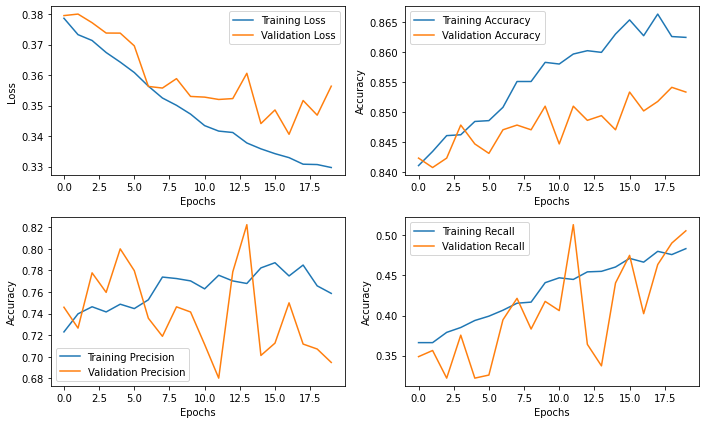

Epoch 1/30
226/226 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8663 - precision: 0.7831 - recall: 0.4821 - val_loss: 0.3388 - val_accuracy: 0.8502 - val_precision: 0.7303 - val_recall: 0.4253
Epoch 2/30
226/226 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8642 - precision: 0.7699 - recall: 0.4828 - val_loss: 0.3385 - val_accuracy: 0.8510 - val_precision: 0.7076 - val_recall: 0.4636
Epoch 3/30
226/226 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8682 - precision: 0.7821 - recall: 0.4963 - val_loss: 0.3460 - val_accuracy: 0.8494 - val_precision: 0.6949 - val_recall: 0.4713
Epoch 4/30
226/226 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8684 - precision: 0.7848 - recall: 0.4943 - val_loss: 0.3461 - val_accuracy: 0.8541 - val_precision: 0.7698 - val_recall: 0.4100
Epoch 5/30
226/226 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8655 - pr

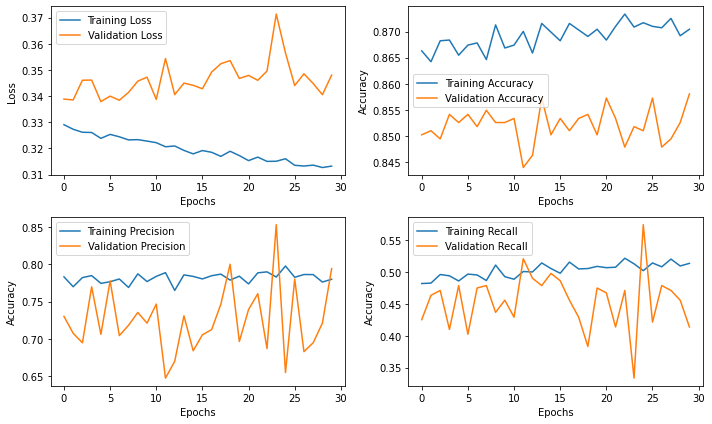

Epoch 1/10
226/226 [==============================] - 1s 3ms/step - loss: 0.3026 - accuracy: 0.8756 - precision: 0.8074 - recall: 0.5172 - val_loss: 0.3396 - val_accuracy: 0.8557 - val_precision: 0.7251 - val_recall: 0.4751
Epoch 2/10
226/226 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8768 - precision: 0.8035 - recall: 0.5293 - val_loss: 0.3393 - val_accuracy: 0.8588 - val_precision: 0.7455 - val_recall: 0.4713
Epoch 3/10
226/226 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8768 - precision: 0.8098 - recall: 0.5226 - val_loss: 0.3400 - val_accuracy: 0.8557 - val_precision: 0.7278 - val_recall: 0.4713
Epoch 4/10
226/226 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8775 - precision: 0.8108 - recall: 0.5260 - val_loss: 0.3407 - val_accuracy: 0.8541 - val_precision: 0.7095 - val_recall: 0.4866
Epoch 5/10
226/226 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8772 - pr

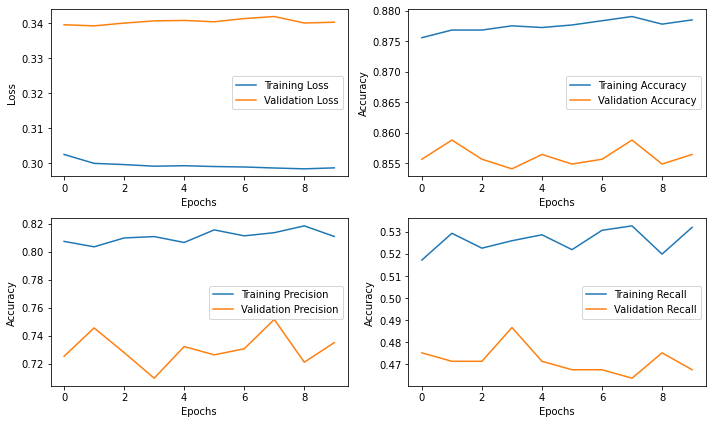

Epoch 1/20
226/226 [==============================] - 1s 3ms/step - loss: 0.2986 - accuracy: 0.8782 - precision: 0.8105 - recall: 0.5307 - val_loss: 0.3405 - val_accuracy: 0.8573 - val_precision: 0.7394 - val_recall: 0.4674
Epoch 2/20
226/226 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8783 - precision: 0.8166 - recall: 0.5253 - val_loss: 0.3397 - val_accuracy: 0.8549 - val_precision: 0.7235 - val_recall: 0.4713
Epoch 3/20
226/226 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8775 - precision: 0.8108 - recall: 0.5260 - val_loss: 0.3403 - val_accuracy: 0.8541 - val_precision: 0.7219 - val_recall: 0.4674
Epoch 4/20
226/226 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8796 - precision: 0.8183 - recall: 0.5314 - val_loss: 0.3406 - val_accuracy: 0.8557 - val_precision: 0.7305 - val_recall: 0.4674
Epoch 5/20
226/226 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8782 - pr

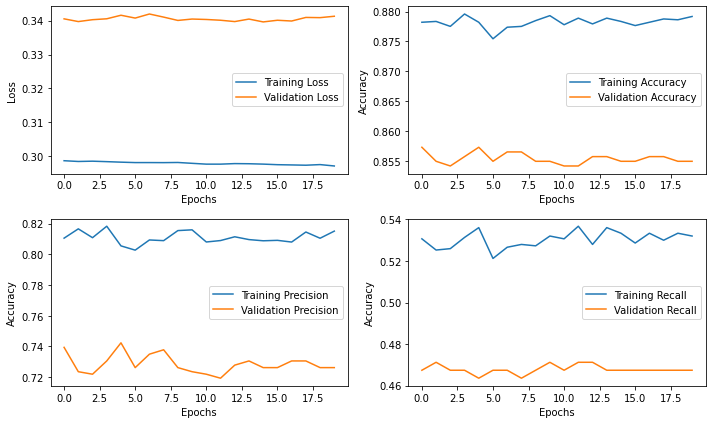

Epoch 1/30
226/226 [==============================] - 1s 2ms/step - loss: 0.2970 - accuracy: 0.8789 - precision: 0.8083 - recall: 0.5374 - val_loss: 0.3406 - val_accuracy: 0.8533 - val_precision: 0.7229 - val_recall: 0.4598
Epoch 2/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8794 - precision: 0.8142 - recall: 0.5347 - val_loss: 0.3407 - val_accuracy: 0.8533 - val_precision: 0.7126 - val_recall: 0.4751
Epoch 3/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8793 - precision: 0.8172 - recall: 0.5307 - val_loss: 0.3417 - val_accuracy: 0.8541 - val_precision: 0.7119 - val_recall: 0.4828
Epoch 4/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8778 - precision: 0.8055 - recall: 0.5334 - val_loss: 0.3406 - val_accuracy: 0.8557 - val_precision: 0.7278 - val_recall: 0.4713
Epoch 5/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8776 - pr

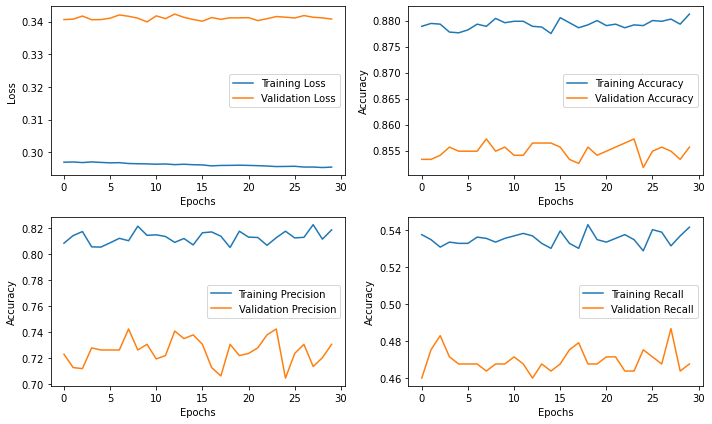

Epoch 1/10
226/226 [==============================] - 1s 3ms/step - loss: 0.2937 - accuracy: 0.8800 - precision: 0.8182 - recall: 0.5341 - val_loss: 0.3408 - val_accuracy: 0.8549 - val_precision: 0.7262 - val_recall: 0.4674
Epoch 2/10
226/226 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8797 - precision: 0.8145 - recall: 0.5361 - val_loss: 0.3408 - val_accuracy: 0.8549 - val_precision: 0.7262 - val_recall: 0.4674
Epoch 3/10
226/226 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8801 - precision: 0.8138 - recall: 0.5394 - val_loss: 0.3409 - val_accuracy: 0.8549 - val_precision: 0.7262 - val_recall: 0.4674
Epoch 4/10
226/226 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8792 - precision: 0.8087 - recall: 0.5388 - val_loss: 0.3410 - val_accuracy: 0.8549 - val_precision: 0.7262 - val_recall: 0.4674
Epoch 5/10
226/226 [==============================] - 1s 2ms/step - loss: 0.2936 - accuracy: 0.8801 - pr

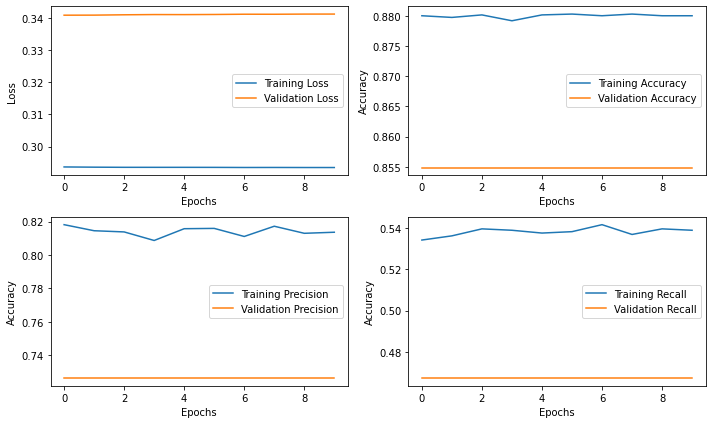

Epoch 1/20
226/226 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8804 - precision: 0.8129 - recall: 0.5421 - val_loss: 0.3411 - val_accuracy: 0.8549 - val_precision: 0.7262 - val_recall: 0.4674
Epoch 2/20
226/226 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.8804 - precision: 0.8168 - recall: 0.5381 - val_loss: 0.3411 - val_accuracy: 0.8549 - val_precision: 0.7235 - val_recall: 0.4713
Epoch 3/20
226/226 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.8806 - precision: 0.8150 - recall: 0.5408 - val_loss: 0.3411 - val_accuracy: 0.8549 - val_precision: 0.7235 - val_recall: 0.4713
Epoch 4/20
226/226 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.8801 - precision: 0.8113 - recall: 0.5421 - val_loss: 0.3411 - val_accuracy: 0.8541 - val_precision: 0.7219 - val_recall: 0.4674
Epoch 5/20
226/226 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8804 - pr

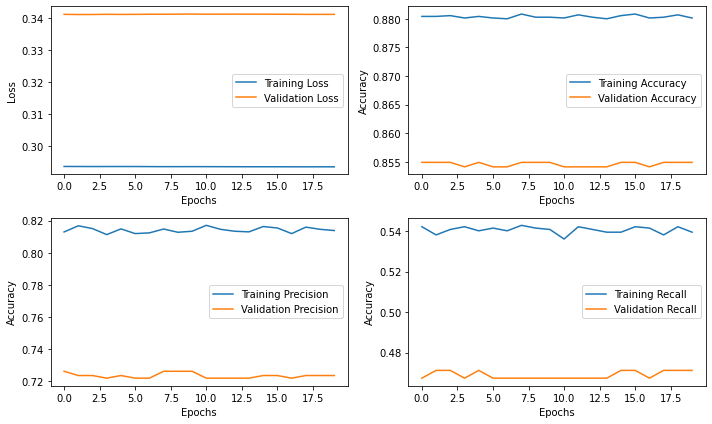

Epoch 1/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8803 - precision: 0.8109 - recall: 0.5435 - val_loss: 0.3412 - val_accuracy: 0.8541 - val_precision: 0.7219 - val_recall: 0.4674
Epoch 2/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8807 - precision: 0.8165 - recall: 0.5401 - val_loss: 0.3412 - val_accuracy: 0.8541 - val_precision: 0.7219 - val_recall: 0.4674
Epoch 3/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8803 - precision: 0.8140 - recall: 0.5401 - val_loss: 0.3411 - val_accuracy: 0.8549 - val_precision: 0.7235 - val_recall: 0.4713
Epoch 4/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8807 - precision: 0.8152 - recall: 0.5415 - val_loss: 0.3411 - val_accuracy: 0.8549 - val_precision: 0.7235 - val_recall: 0.4713
Epoch 5/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8806 - pr

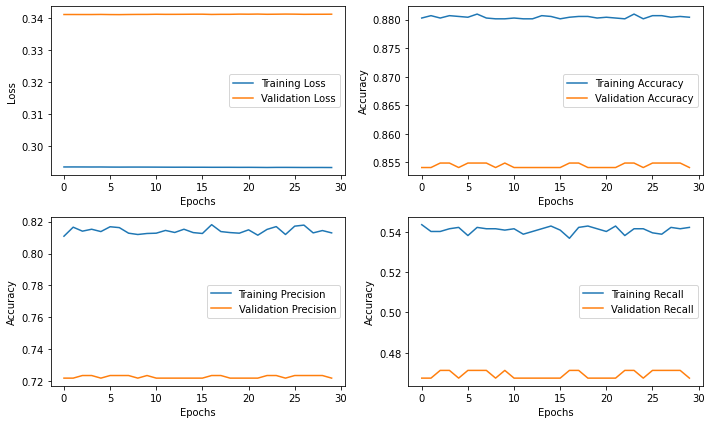

Epoch 1/10
226/226 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.7961 - precision: 0.5219 - recall: 0.0802 - val_loss: 0.4250 - val_accuracy: 0.8118 - val_precision: 0.7234 - val_recall: 0.1303
Epoch 2/10
226/226 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8151 - precision: 0.6842 - recall: 0.1841 - val_loss: 0.4164 - val_accuracy: 0.8275 - val_precision: 0.6881 - val_recall: 0.2874
Epoch 3/10
226/226 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8238 - precision: 0.6923 - recall: 0.2549 - val_loss: 0.4069 - val_accuracy: 0.8251 - val_precision: 0.7375 - val_recall: 0.2261
Epoch 4/10
226/226 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8309 - precision: 0.7216 - recall: 0.2866 - val_loss: 0.3974 - val_accuracy: 0.8376 - val_precision: 0.7328 - val_recall: 0.3257
Epoch 5/10
226/226 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8370 - pr

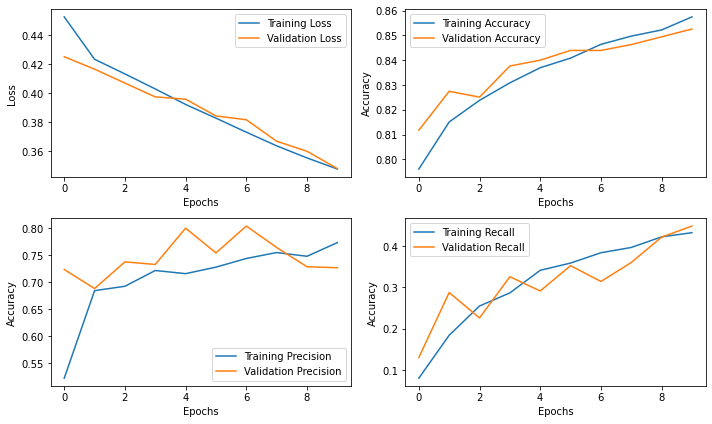

Epoch 1/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8597 - precision: 0.7717 - recall: 0.4491 - val_loss: 0.3576 - val_accuracy: 0.8502 - val_precision: 0.7966 - val_recall: 0.3602
Epoch 2/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8621 - precision: 0.7721 - recall: 0.4659 - val_loss: 0.3488 - val_accuracy: 0.8478 - val_precision: 0.7445 - val_recall: 0.3908
Epoch 3/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8627 - precision: 0.7731 - recall: 0.4686 - val_loss: 0.3542 - val_accuracy: 0.8494 - val_precision: 0.7634 - val_recall: 0.3831
Epoch 4/20
226/226 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8639 - precision: 0.7665 - recall: 0.4848 - val_loss: 0.3411 - val_accuracy: 0.8549 - val_precision: 0.7346 - val_recall: 0.4559
Epoch 5/20
226/226 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8682 - pr

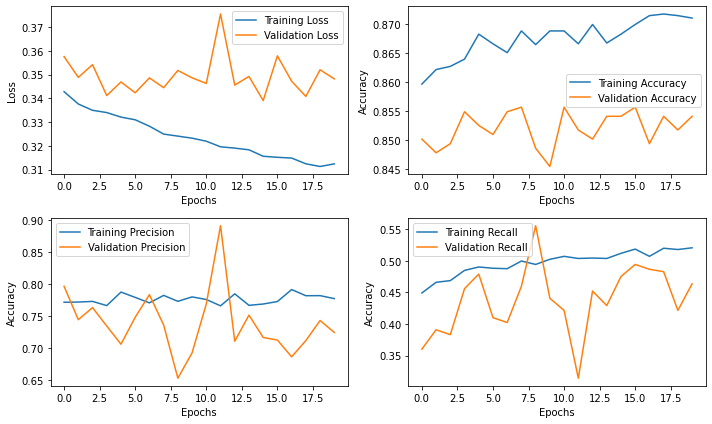

Epoch 1/30
226/226 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8703 - precision: 0.7708 - recall: 0.5239 - val_loss: 0.3548 - val_accuracy: 0.8549 - val_precision: 0.7754 - val_recall: 0.4100
Epoch 2/30
226/226 [==============================] - 1s 2ms/step - loss: 0.3093 - accuracy: 0.8709 - precision: 0.7783 - recall: 0.5185 - val_loss: 0.3537 - val_accuracy: 0.8463 - val_precision: 0.6757 - val_recall: 0.4789
Epoch 3/30
226/226 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.8752 - precision: 0.7902 - recall: 0.5334 - val_loss: 0.3516 - val_accuracy: 0.8533 - val_precision: 0.7202 - val_recall: 0.4636
Epoch 4/30
226/226 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8756 - precision: 0.7944 - recall: 0.5314 - val_loss: 0.3462 - val_accuracy: 0.8557 - val_precision: 0.7305 - val_recall: 0.4674
Epoch 5/30
226/226 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8739 - pr

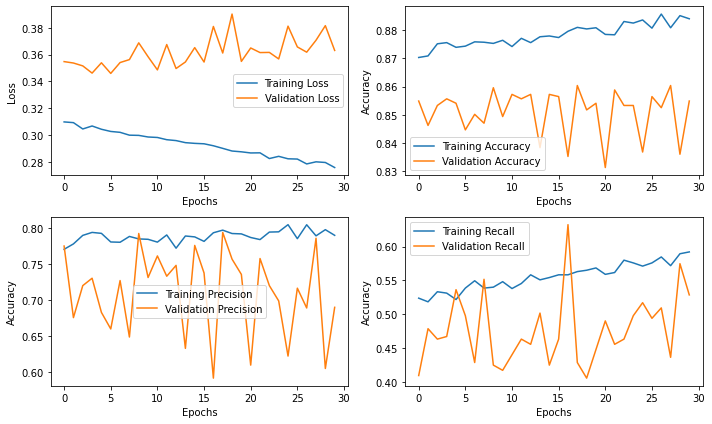

Epoch 1/10
226/226 [==============================] - 2s 4ms/step - loss: 0.2524 - accuracy: 0.8962 - precision: 0.8422 - recall: 0.6082 - val_loss: 0.3553 - val_accuracy: 0.8525 - val_precision: 0.6911 - val_recall: 0.5057
Epoch 2/10
226/226 [==============================] - 1s 3ms/step - loss: 0.2489 - accuracy: 0.8976 - precision: 0.8430 - recall: 0.6156 - val_loss: 0.3576 - val_accuracy: 0.8478 - val_precision: 0.6718 - val_recall: 0.5019
Epoch 3/10
226/226 [==============================] - 1s 3ms/step - loss: 0.2478 - accuracy: 0.8985 - precision: 0.8415 - recall: 0.6231 - val_loss: 0.3591 - val_accuracy: 0.8525 - val_precision: 0.6911 - val_recall: 0.5057
Epoch 4/10
226/226 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8985 - precision: 0.8415 - recall: 0.6231 - val_loss: 0.3598 - val_accuracy: 0.8565 - val_precision: 0.7167 - val_recall: 0.4943
Epoch 5/10
226/226 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8976 - pr

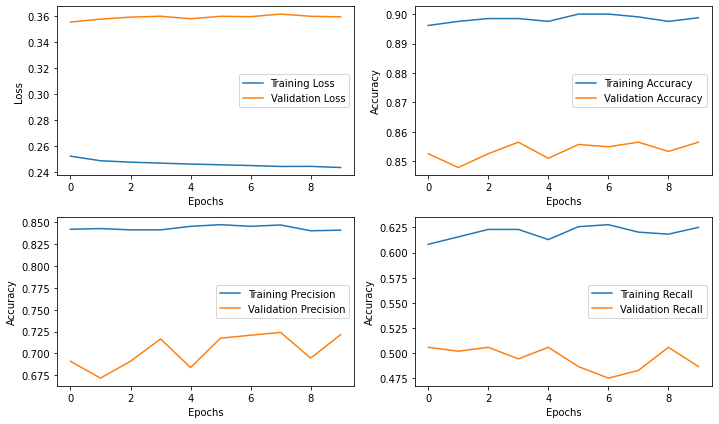

Epoch 1/20
226/226 [==============================] - 1s 3ms/step - loss: 0.2436 - accuracy: 0.8990 - precision: 0.8432 - recall: 0.6237 - val_loss: 0.3592 - val_accuracy: 0.8510 - val_precision: 0.6859 - val_recall: 0.5019
Epoch 2/20
226/226 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.8983 - precision: 0.8412 - recall: 0.6217 - val_loss: 0.3602 - val_accuracy: 0.8541 - val_precision: 0.7072 - val_recall: 0.4904
Epoch 3/20
226/226 [==============================] - 1s 2ms/step - loss: 0.2427 - accuracy: 0.8985 - precision: 0.8415 - recall: 0.6231 - val_loss: 0.3605 - val_accuracy: 0.8471 - val_precision: 0.6684 - val_recall: 0.5019
Epoch 4/20
226/226 [==============================] - 1s 3ms/step - loss: 0.2422 - accuracy: 0.9012 - precision: 0.8505 - recall: 0.6291 - val_loss: 0.3596 - val_accuracy: 0.8431 - val_precision: 0.6502 - val_recall: 0.5057
Epoch 5/20
226/226 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.9017 - pr

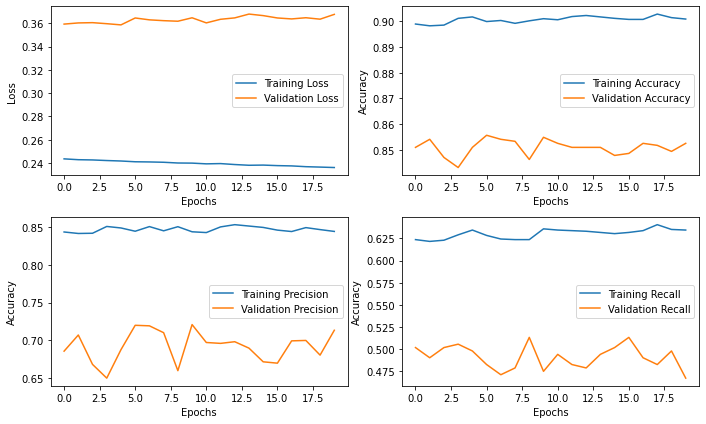

Epoch 1/30
226/226 [==============================] - 1s 3ms/step - loss: 0.2360 - accuracy: 0.9015 - precision: 0.8476 - recall: 0.6339 - val_loss: 0.3699 - val_accuracy: 0.8478 - val_precision: 0.6754 - val_recall: 0.4943
Epoch 2/30
226/226 [==============================] - 1s 3ms/step - loss: 0.2356 - accuracy: 0.9012 - precision: 0.8461 - recall: 0.6339 - val_loss: 0.3690 - val_accuracy: 0.8525 - val_precision: 0.7062 - val_recall: 0.4789
Epoch 3/30
226/226 [==============================] - 1s 2ms/step - loss: 0.2354 - accuracy: 0.9026 - precision: 0.8525 - recall: 0.6352 - val_loss: 0.3686 - val_accuracy: 0.8525 - val_precision: 0.6931 - val_recall: 0.5019
Epoch 4/30
226/226 [==============================] - 1s 2ms/step - loss: 0.2355 - accuracy: 0.9012 - precision: 0.8492 - recall: 0.6305 - val_loss: 0.3672 - val_accuracy: 0.8447 - val_precision: 0.6522 - val_recall: 0.5172
Epoch 5/30
226/226 [==============================] - 1s 3ms/step - loss: 0.2347 - accuracy: 0.9010 - pr

In [ ]:
model_evaluation(models,lr,epochs)

In [ ]:
history